In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
!pip install folium
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import json
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
!pip install statsmodels
import statsmodels.api as sm

In [2]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
world_data_df = pd.read_csv('world_data.csv')

In [4]:
world_data_df

Country Name Country Code  Year  Agriculture (% GDP)  \
0     Afghanistan          AFG  2000            27.501127   
1     Afghanistan          AFG  2001            27.501127   
2     Afghanistan          AFG  2002            38.627892   
3     Afghanistan          AFG  2003            37.418855   
4     Afghanistan          AFG  2004            29.721067   
...           ...          ...   ...                  ...   
5101     Zimbabwe          ZWE  2018             7.319375   
5102     Zimbabwe          ZWE  2019             9.819262   
5103     Zimbabwe          ZWE  2020             8.772859   
5104     Zimbabwe          ZWE  2021             8.849899   
5105     Zimbabwe          ZWE  2022            12.069543   

      Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
0                  40.717968                      13.670101             NaN   
1                  40.717968                      13.670101             NaN   
2                  40.717968                      13.670101             NaN   
3                  40.717968                      13.670101             NaN   
4                  40.717968                      13.670101             NaN   
...                      ...                            ...             ...   
5101               50.509980                      19.039841       26.163973   
5102               54.469350                      22.837985       27.163459   
5103               49.833418                      15.666611       25.917014   
5104               49.833418                      22.837985       25.411446   
5105               49.833418                      22.837985       28.908919   

               GDP  Health Expenditure (% GDP)  Import (% GDP)  \
0     1.415197e+10                   10.902580             NaN   
1     1.415197e+10                   10.902580             NaN   
2     3.854235e+09                    9.443391             NaN   
3     4.539497e+09                    8.941258             NaN   
4     5.220825e+09                    9.808474             NaN   
...            ...                         ...             ...   
5101  3.415607e+10                    4.670418       28.386297   
5102  2.183223e+10                    3.659765       25.524111   
5103  2.150970e+10                    3.425581       28.733547   
5104  2.837124e+10                    6.704907       30.901234   
5105  2.067806e+10                    6.704907       39.540243   

      Industry (% GDP)  Inflation Rate  R&D  Service (% GDP)  Unemployment  \
0            20.494909        6.124620  NaN        48.302753         8.054   
1            20.494909        6.124620  NaN        48.302753         8.040   
2            23.810127        6.124620  NaN        36.151155         8.186   
3            22.710864        6.124620  NaN        37.444804         8.122   
4            26.226790        6.124620  NaN        41.110895         8.053   
...                ...             ...  ...              ...           ...   
5101         31.037898       10.618866  NaN        55.984768         6.784   
5102         32.025947      255.304991  NaN        52.677299         7.370   
5103         32.767517      557.201817  NaN        52.892574         7.898   
5104         28.805586       98.546105  NaN        56.639870         8.067   
5105         26.204944      104.705171  NaN        57.824927         7.945   

      Population      Land Continent Name        Export        Import  \
0     19542982.0  652860.0           Asia           NaN           NaN   
1     19688632.0  652860.0           Asia           NaN           NaN   
2     21000256.0  652860.0           Asia           NaN           NaN   
3     22645130.0  652860.0           Asia           NaN           NaN   
4     23553551.0  652860.0           Asia           NaN           NaN   
...          ...       ...            ...           ...           ...   
5101  15052184.0  390760.0         Africa  8.936585e+09  9.695644e+09   
5102  153

In [5]:
result = world_data_df.groupby('Country Name')['Year'].agg(['max', 'min']).reset_index()
result

Country Name   max   min
0              Afghanistan  2022  2000
1                  Albania  2022  2000
2                  Algeria  2022  2000
3           American Samoa  2022  2000
4                  Andorra  2022  2000
..                     ...   ...   ...
210  Virgin Islands (U.S.)  2022  2000
211     West Bank and Gaza  2022  2000
212            Yemen, Rep.  2022  2000
213                 Zambia  2022  2000
214               Zimbabwe  2022  2000

[215 rows x 3 columns]

In [6]:
null_counts = world_data_df.groupby('Country Name').apply(lambda x: x.isnull().sum())
null_counts

Country Name  Country Code  Year  Agriculture (% GDP)  \
Country Name                                                                   
Afghanistan                       0             0     0                    0   
Albania                           0             0     0                    0   
Algeria                           0             0     0                    0   
American Samoa                    0             0     0                   23   
Andorra                           0             0     0                    0   
...                             ...           ...   ...                  ...   
Virgin Islands (U.S.)             0             0     0                   23   
West Bank and Gaza                0             0     0                    0   
Yemen, Rep.                       0             0     0                    0   
Zambia                            0             0     0                    0   
Zimbabwe                          0             0     0                    0   

                       Ease of Doing Business  Education Expenditure (% GDP)  \
Country Name                                                                   
Afghanistan                                 0                              0   
Albania                                     0                              0   
Algeria                                     0                              0   
American Samoa                             23                             23   
Andorra                                    23                              0   
...                                       ...                            ...   
Virgin Islands (U.S.)                      23                             23   
West Bank and Gaza                          0                              0   
Yemen, Rep.                                 0                              0   
Zambia                                      0                              0   
Zimbabwe                                    0                              0   

                       Export (% GDP)  GDP  Health Expenditure (% GDP)  \
Country Name                                                             
Afghanistan                        23    0                           0   
Albania                             0    0                           0   
Algeria                             0    0                           0   
American Samoa                      0    0                          23   
Andorra                            23    0                           0   
...                               ...  ...                         ...   
Virgin Islands (U.S.)               0    0                          23   
West Bank and Gaza                  0    0                          23   
Yemen, Rep.                         0    0                           0   
Zambia                              0    0                           0   
Zimbabwe                            0    0                           0   

                       Import (% GDP)  Industry (% GDP)  Inflation Rate  R&D  \
Country Name                                                                   
Afghanistan                        23                 0               0   23   
Albania                             0                 0               0    0   
Algeria                             0                 0               0    0   
American Samoa                      0                23              23    0   
Andorra                            23                 0              23   23   
...                               ...               ...             ...  ...   
Virgin Islands (U.S.)               0                23              23    0   
West Bank and Gaza                  0                 0               0    0   
Yemen, Rep.                         0                 0               0   23   
Zambia                              0                 0               0    0   
Zimbabwe          

In [7]:
sum_nulls_per_country = null_counts.sum(axis=1)
null_counts['Sum_Nulls_Row'] = sum_nulls_per_country
null_counts

Country Name  Country Code  Year  Agriculture (% GDP)  \
Country Name                                                                   
Afghanistan                       0             0     0                    0   
Albania                           0             0     0                    0   
Algeria                           0             0     0                    0   
American Samoa                    0             0     0                   23   
Andorra                           0             0     0                    0   
...                             ...           ...   ...                  ...   
Virgin Islands (U.S.)             0             0     0                   23   
West Bank and Gaza                0             0     0                    0   
Yemen, Rep.                       0             0     0                    0   
Zambia                            0             0     0                    0   
Zimbabwe                          0             0     0                    0   

                       Ease of Doing Business  Education Expenditure (% GDP)  \
Country Name                                                                   
Afghanistan                                 0                              0   
Albania                                     0                              0   
Algeria                                     0                              0   
American Samoa                             23                             23   
Andorra                                    23                              0   
...                                       ...                            ...   
Virgin Islands (U.S.)                      23                             23   
West Bank and Gaza                          0                              0   
Yemen, Rep.                                 0                              0   
Zambia                                      0                              0   
Zimbabwe                                    0                              0   

                       Export (% GDP)  GDP  Health Expenditure (% GDP)  \
Country Name                                                             
Afghanistan                        23    0                           0   
Albania                             0    0                           0   
Algeria                             0    0                           0   
American Samoa                      0    0                          23   
Andorra                            23    0                           0   
...                               ...  ...                         ...   
Virgin Islands (U.S.)               0    0                          23   
West Bank and Gaza                  0    0                          23   
Yemen, Rep.                         0    0                           0   
Zambia                              0    0                           0   
Zimbabwe                            0    0                           0   

                       Import (% GDP)  Industry (% GDP)  Inflation Rate  R&D  \
Country Name                                                                   
Afghanistan                        23                 0               0   23   
Albania                             0                 0               0    0   
Algeria                             0                 0               0    0   
American Samoa                      0                23              23    0   
Andorra                            23                 0              23   23   
...                               ...               ...             ...  ...   
Virgin Islands (U.S.)               0                23              23    0   
West Bank and Gaza                  0                 0               0    0   
Yemen, Rep.                         0                 0               0   23   
Zambia                              0                 0               0    0   
Zimbabwe          

In [8]:
len(null_counts)
#there were originally 215 countries in the data set

215

In [9]:
clean_countries = null_counts[null_counts['Sum_Nulls_Row'] == 0]
country_list = clean_countries['Country Name'].index.tolist()
#country_list
#len(clean_countries)

In [10]:
clean_world = world_data_df[world_data_df['Country Name'].isin(country_list)]
clean_world

Country Name Country Code  Year  Agriculture (% GDP)  \
23        Albania          ALB  2000            24.515412   
24        Albania          ALB  2001            22.716164   
25        Albania          ALB  2002            22.025114   
26        Albania          ALB  2003            21.978257   
27        Albania          ALB  2004            20.537486   
...           ...          ...   ...                  ...   
5078       Zambia          ZMB  2018             3.341124   
5079       Zambia          ZMB  2019             2.860775   
5080       Zambia          ZMB  2020             2.977086   
5081       Zambia          ZMB  2021             3.393277   
5082       Zambia          ZMB  2022             3.388658   

      Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
23                 64.763660                      10.137030       20.115286   
24                 64.763660                      10.581930       21.333411   
25                 64.763660                       9.886920       20.945616   
26                 64.763660                      10.573600       20.847386   
27                 64.763660                      10.703160       22.217561   
...                      ...                            ...             ...   
5078               65.711700                      17.118719       37.957405   
5079               66.936480                      15.291870       34.636193   
5080               63.517218                      12.378020       46.790165   
5081               63.517218                      11.514140       52.078387   
5082               63.517218                      10.447814       38.431953   

               GDP  Health Expenditure (% GDP)  Import (% GDP)  \
23    3.480355e+09                    5.944186       43.338788   
24    3.922101e+09                    5.925833       45.157613   
25    4.348068e+09                    5.664600       47.579452   
26    5.611496e+09                    6.198919       46.173175   
27    7.184686e+09                    6.055778       44.829627   
...            ...                         ...             ...   
5078  2.631151e+10                    5.056766       36.930965   
5079  2.330867e+10                    5.319501       34.155012   
5080  1.811064e+10                    5.617884       32.535322   
5081  2.214765e+10                    5.200252       33.913790   
5082  2.978445e+10                    5.200252       27.156932   

      Industry (% GDP)  Inflation Rate           R&D  Service (% GDP)  \
23           19.395689        0.050018  4.205835e+06        44.302961   
24           21.735774        3.107588  4.739663e+06        44.943021   
25           23.106370        7.770526  5.254423e+06        43.776515   
26           24.055609        0.484003  6.781213e+06        41.911476   
27           24.665562        2.280019  8.682333e+06        42.580417   
...                ...             ...           ...              ...   
5078         34.485322        7.494572  1.785288e+07        54.244543   
5079         34.941981        9.150316  1.581540e+07        54.603759   
5080         40.257899       15.733060  1.228843e+07        53.616377   
5081         42.502077       22.020768  1.502762e+07        49.884158   
5082         33.833455       10.993204  2.020935e+07        57.988372   

      Unemployment  Population      Land Continent Name        Export  \
23          19.028   3089027.0   28750.0         Europe  7.000834e+08   
24          18.575   3060173.0   28750.0         Europe  8.367179e+08   
25          17.895   3051010.0   28750.0         Europe  9.107297e+08   
26          16.989   3039616.0   28750.0         Europe  1.169850e+09   
27          16.310   3026939.0   28750.0         Europe  1.596262e+09   
...            ...         ...       ...            ...           ...   
5078         5.030  17835893.0  752610.0         Africa  9.987165e+09   
5079         5.540  18380477.0  752610.0         Africa  8.073235e+09

In [11]:
len(clean_countries)

131

In [12]:
clean_world.describe()

Year  Agriculture (% GDP)  Ease of Doing Business  \
count  3174.000000          3174.000000             3174.000000   
mean   2011.000000            10.253019               65.961429   
std       6.634295             9.867331               12.207255   
min    2000.000000             0.028110               30.034840   
25%    2005.000000             2.443053               57.491414   
50%    2011.000000             6.677414               67.756235   
75%    2017.000000            15.289288               76.049054   
max    2022.000000            57.140091               87.166330   

       Education Expenditure (% GDP)  Export (% GDP)           GDP  \
count                    3174.000000     3174.000000  3.174000e+03   
mean                       14.330259       42.265926  4.839905e+11   
std                         4.615911       27.989518  1.747878e+12   
min                         4.645980        1.571162  4.870387e+08   
25%                        10.868630       25.266969  1.390129e+10   
50%                        13.614069       35.829535  5.605121e+10   
75%                        17.296648       52.559041  2.742948e+11   
max                        38.106159      228.993771  2.546270e+13   

       Health Expenditure (% GDP)  Import (% GDP)  Industry (% GDP)  \
count                 3174.000000     3174.000000       3174.000000   
mean                     6.109929       44.569644         28.916802   
std                      2.466585       24.723931         11.368726   
min                      1.550592        1.127672          4.871401   
25%                      4.192426       28.137036         21.323001   
50%                      5.832752       38.755094         26.172411   
75%                      7.831998       56.039138         33.210896   
max                     18.815826      208.332944         84.795979   

       Inflation Rate           R&D  Service (% GDP)  Unemployment  \
count     3174.000000  3.174000e+03      3174.000000   3174.000000   
mean         6.980353  9.537664e+09        53.170278      7.663552   
std         18.195597  4.639618e+10        11.102128      5.437666   
min        -16.859691  1.574855e+05         6.448068      0.095000   
25%          1.812394  2.722972e+07        45.596558      3.830000   
50%          3.750498  1.931622e+08        53.479083      6.258500   
75%          7.579655  2.266232e+09        60.701008     10.216000   
max        513.906844  7.266243e+11        93.361826     37.320000   

         Population          Land        Export        Import  \
count  3.174000e+03  3.174000e+03  3.174000e+03  3.174000e+03   
mean   4.926893e+07  1.032488e+06  1.331015e+11  1.294087e+11   
std    1.596920e+08  2.612308e+06  3.088885e+11  3.196561e+11   
min    2.812050e+05  3.200000e+02  3.867637e+07  1.384007e+08   
25%    4.189402e+06  6.459400e+04  5.100378e+09  6.554883e+09   
50%    1.069823e+07  2.400450e+05  2.127028e+10  2.166987e+10   
75%    3.673206e+07  7.853500e+05  1.070526e+11  9.788495e+10   
max    1.417173e+09  1.709825e+07  3.714245e+12  3.874205e+12   

       Education Expenditure  Health Expenditure     Net Trade  \
count           3.174000e+03        3.174000e+03  3.174000e+03   
mean            6.202180e+10        4.536452e+10  3.692777e+09   
std             2.341665e+11        2.392038e+11  6.497359e+10   
min             4.124652e+07        2.390940e+07 -9.540869e+11   
25%             2.093131e+09        7.727351e+08 -2.616981e+09   
50%             7.060702e+09        2.822285e+09 -4.227900e+08   
75%             3.798505e+10        1.673480e+10  5.518245e+09   
max             3.667693e+12        3.966028e+12  5.766511e+11   

       GDP Per Capita  Population Density  
count     3174.000000         3174.000000  
mean     14157.196978          173.718989  
std      19695.621098          622.204464  
min        110.460875            1.567002  
25%       1645.133744           29.516817  
50%       5026.375861           76.648342  
75%      19012.6807

In [13]:
#agriculture
#industry
#service
clean_world['Agriculture Contribution'] = (clean_world['Agriculture (% GDP)'] / 100) * clean_world['GDP']
clean_world['Industry Contribution'] = (clean_world['Industry (% GDP)'] / 100) * clean_world['GDP']
clean_world['Service Contribution'] = (clean_world['Service (% GDP)'] / 100) * clean_world['GDP']

C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\672746775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_world['Agriculture Contribution'] = (clean_world['Agriculture (% GDP)'] / 100) * clean_world['GDP']
C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\672746775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_world['Industry Contribution'] = (clean_world['Industry (% GDP)'] / 100) * clean_world['GDP']
C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\672746775.py:6

In [14]:
clean_world

Country Name Country Code  Year  Agriculture (% GDP)  \
23        Albania          ALB  2000            24.515412   
24        Albania          ALB  2001            22.716164   
25        Albania          ALB  2002            22.025114   
26        Albania          ALB  2003            21.978257   
27        Albania          ALB  2004            20.537486   
...           ...          ...   ...                  ...   
5078       Zambia          ZMB  2018             3.341124   
5079       Zambia          ZMB  2019             2.860775   
5080       Zambia          ZMB  2020             2.977086   
5081       Zambia          ZMB  2021             3.393277   
5082       Zambia          ZMB  2022             3.388658   

      Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
23                 64.763660                      10.137030       20.115286   
24                 64.763660                      10.581930       21.333411   
25                 64.763660                       9.886920       20.945616   
26                 64.763660                      10.573600       20.847386   
27                 64.763660                      10.703160       22.217561   
...                      ...                            ...             ...   
5078               65.711700                      17.118719       37.957405   
5079               66.936480                      15.291870       34.636193   
5080               63.517218                      12.378020       46.790165   
5081               63.517218                      11.514140       52.078387   
5082               63.517218                      10.447814       38.431953   

               GDP  Health Expenditure (% GDP)  Import (% GDP)  \
23    3.480355e+09                    5.944186       43.338788   
24    3.922101e+09                    5.925833       45.157613   
25    4.348068e+09                    5.664600       47.579452   
26    5.611496e+09                    6.198919       46.173175   
27    7.184686e+09                    6.055778       44.829627   
...            ...                         ...             ...   
5078  2.631151e+10                    5.056766       36.930965   
5079  2.330867e+10                    5.319501       34.155012   
5080  1.811064e+10                    5.617884       32.535322   
5081  2.214765e+10                    5.200252       33.913790   
5082  2.978445e+10                    5.200252       27.156932   

      Industry (% GDP)  Inflation Rate           R&D  Service (% GDP)  \
23           19.395689        0.050018  4.205835e+06        44.302961   
24           21.735774        3.107588  4.739663e+06        44.943021   
25           23.106370        7.770526  5.254423e+06        43.776515   
26           24.055609        0.484003  6.781213e+06        41.911476   
27           24.665562        2.280019  8.682333e+06        42.580417   
...                ...             ...           ...              ...   
5078         34.485322        7.494572  1.785288e+07        54.244543   
5079         34.941981        9.150316  1.581540e+07        54.603759   
5080         40.257899       15.733060  1.228843e+07        53.616377   
5081         42.502077       22.020768  1.502762e+07        49.884158   
5082         33.833455       10.993204  2.020935e+07        57.988372   

      Unemployment  Population      Land Continent Name        Export  \
23          19.028   3089027.0   28750.0         Europe  7.000834e+08   
24          18.575   3060173.0   28750.0         Europe  8.367179e+08   
25          17.895   3051010.0   28750.0         Europe  9.107297e+08   
26          16.989   3039616.0   28750.0         Europe  1.169850e+09   
27          16.310   3026939.0   28750.0         Europe  1.596262e+09   
...            ...         ...       ...            ...           ...   
5078         5.030  17835893.0  752610.0         Africa  9.987165e+09   
5079         5.540  18380477.0  752610.0         Africa  8.073235e+09

In [15]:
columns_to_drop = ['Agriculture (% GDP)', 'Education Expenditure (% GDP)', 'Health Expenditure (% GDP)'
                  , 'Import (% GDP)', 'Industry (% GDP)', 'Service (% GDP)'
                  , 'Land', 'Net Trade', 'GDP Per Capita', 'Population Density', 'Export (% GDP)']
clean_world.drop(columns=columns_to_drop, inplace=True)
clean_world

C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\1484550022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_world.drop(columns=columns_to_drop, inplace=True)


Country Name Country Code  Year  Ease of Doing Business           GDP  \
23        Albania          ALB  2000               64.763660  3.480355e+09   
24        Albania          ALB  2001               64.763660  3.922101e+09   
25        Albania          ALB  2002               64.763660  4.348068e+09   
26        Albania          ALB  2003               64.763660  5.611496e+09   
27        Albania          ALB  2004               64.763660  7.184686e+09   
...           ...          ...   ...                     ...           ...   
5078       Zambia          ZMB  2018               65.711700  2.631151e+10   
5079       Zambia          ZMB  2019               66.936480  2.330867e+10   
5080       Zambia          ZMB  2020               63.517218  1.811064e+10   
5081       Zambia          ZMB  2021               63.517218  2.214765e+10   
5082       Zambia          ZMB  2022               63.517218  2.978445e+10   

      Inflation Rate           R&D  Unemployment  Population Continent Name  \
23          0.050018  4.205835e+06        19.028   3089027.0         Europe   
24          3.107588  4.739663e+06        18.575   3060173.0         Europe   
25          7.770526  5.254423e+06        17.895   3051010.0         Europe   
26          0.484003  6.781213e+06        16.989   3039616.0         Europe   
27          2.280019  8.682333e+06        16.310   3026939.0         Europe   
...              ...           ...           ...         ...            ...   
5078        7.494572  1.785288e+07         5.030  17835893.0         Africa   
5079        9.150316  1.581540e+07         5.540  18380477.0         Africa   
5080       15.733060  1.228843e+07         6.030  18927715.0         Africa   
5081       22.020768  1.502762e+07         6.220  19473125.0         Africa   
5082       10.993204  2.020935e+07         6.131  20017675.0         Africa   

            Export        Import  Education Expenditure  Health Expenditure  \
23    7.000834e+08  1.508344e+09           3.528046e+08        2.068788e+08   
24    8.367179e+08  1.771127e+09           4.150340e+08        2.324171e+08   
25    9.107297e+08  2.068787e+09           4.298900e+08        2.463007e+08   
26    1.169850e+09  2.591006e+09           5.933372e+08        3.478521e+08   
27    1.596262e+09  3.220868e+09           7.689884e+08        4.350887e+08   
...            ...           ...                    ...                 ...   
5078  9.987165e+09  9.717093e+09           4.504193e+09        1.330511e+09   
5079  8.073235e+09  7.961078e+09           3.564331e+09        1.239905e+09   
5080  8.473998e+09  5.892355e+09           2.241739e+09        1.017435e+09   
5081  1.153414e+10  7.511107e+09           2.550111e+09        1.151733e+09   
5082  1.144675e+10  8.088544e+09           3.111824e+09        1.548867e+09   

      Agriculture Contribution  Industry Contribution  Service Contribution  
23                8.532234e+08           6.750389e+08          1.541900e+09  
24                8.909509e+08           8.524990e+08          1.762711e+09  
25                9.576670e+08           1.004681e+09          1.903433e+09  
26                1.233309e+09           1.349880e+09          2.351861e+09  
27                1.475554e+09           1.772143e+09          3.059269e+09  
...                        ...                    ...                   ...  
5078              8.791001e+08           9.073608e+09          1.427256e+10  
5079              6.668085e+08           8.144510e+09          1.272741e+10  
5080              5.391693e+08           7.290963e+09          9.710268e+09  
5081              7.515310e+08           9.413211e+09          1.104817e+10  
5082              1.009293e+09           1.007711e+10          1.727152e+10  

[3174 rows x 17 columns]

In [16]:
clean_world_numeric = clean_world[['GDP', 'Ease of Doing Business', 'Inflation Rate', 'R&D'
                                  , 'Unemployment', 'Population', 'Export'
                                  , 'Import', 'Education Expenditure', 'Health Expenditure'
                                  , 'Agriculture Contribution', 'Industry Contribution', 'Service Contribution']]
clean_world_numeric

GDP  Ease of Doing Business  Inflation Rate           R&D  \
23    3.480355e+09               64.763660        0.050018  4.205835e+06   
24    3.922101e+09               64.763660        3.107588  4.739663e+06   
25    4.348068e+09               64.763660        7.770526  5.254423e+06   
26    5.611496e+09               64.763660        0.484003  6.781213e+06   
27    7.184686e+09               64.763660        2.280019  8.682333e+06   
...            ...                     ...             ...           ...   
5078  2.631151e+10               65.711700        7.494572  1.785288e+07   
5079  2.330867e+10               66.936480        9.150316  1.581540e+07   
5080  1.811064e+10               63.517218       15.733060  1.228843e+07   
5081  2.214765e+10               63.517218       22.020768  1.502762e+07   
5082  2.978445e+10               63.517218       10.993204  2.020935e+07   

      Unemployment  Population        Export        Import  \
23          19.028   3089027.0  7.000834e+08  1.508344e+09   
24          18.575   3060173.0  8.367179e+08  1.771127e+09   
25          17.895   3051010.0  9.107297e+08  2.068787e+09   
26          16.989   3039616.0  1.169850e+09  2.591006e+09   
27          16.310   3026939.0  1.596262e+09  3.220868e+09   
...            ...         ...           ...           ...   
5078         5.030  17835893.0  9.987165e+09  9.717093e+09   
5079         5.540  18380477.0  8.073235e+09  7.961078e+09   
5080         6.030  18927715.0  8.473998e+09  5.892355e+09   
5081         6.220  19473125.0  1.153414e+10  7.511107e+09   
5082         6.131  20017675.0  1.144675e+10  8.088544e+09   

      Education Expenditure  Health Expenditure  Agriculture Contribution  \
23             3.528046e+08        2.068788e+08              8.532234e+08   
24             4.150340e+08        2.324171e+08              8.909509e+08   
25             4.298900e+08        2.463007e+08              9.576670e+08   
26             5.933372e+08        3.478521e+08              1.233309e+09   
27             7.689884e+08        4.350887e+08              1.475554e+09   
...                     ...                 ...                       ...   
5078           4.504193e+09        1.330511e+09              8.791001e+08   
5079           3.564331e+09        1.239905e+09              6.668085e+08   
5080           2.241739e+09        1.017435e+09              5.391693e+08   
5081           2.550111e+09        1.151733e+09              7.515310e+08   
5082           3.111824e+09        1.548867e+09              1.009293e+09   

      Industry Contribution  Service Contribution  
23             6.750389e+08          1.541900e+09  
24             8.524990e+08          1.762711e+09  
25             1.004681e+09          1.903433e+09  
26             1.349880e+09          2.351861e+09  
27             1.772143e+09          3.059269e+09  
...                     ...                   ...  
5078           9.073608e+09          1.427256e+10  
5079           8.144510e+09          1.272741e+10  
5080           7.290963e+09          9.710268e+09  
5081           9.413211e+09          1.104817e+10  
5082           1.007711e+10          1.727152e+10  

[3174 rows x 13 columns]

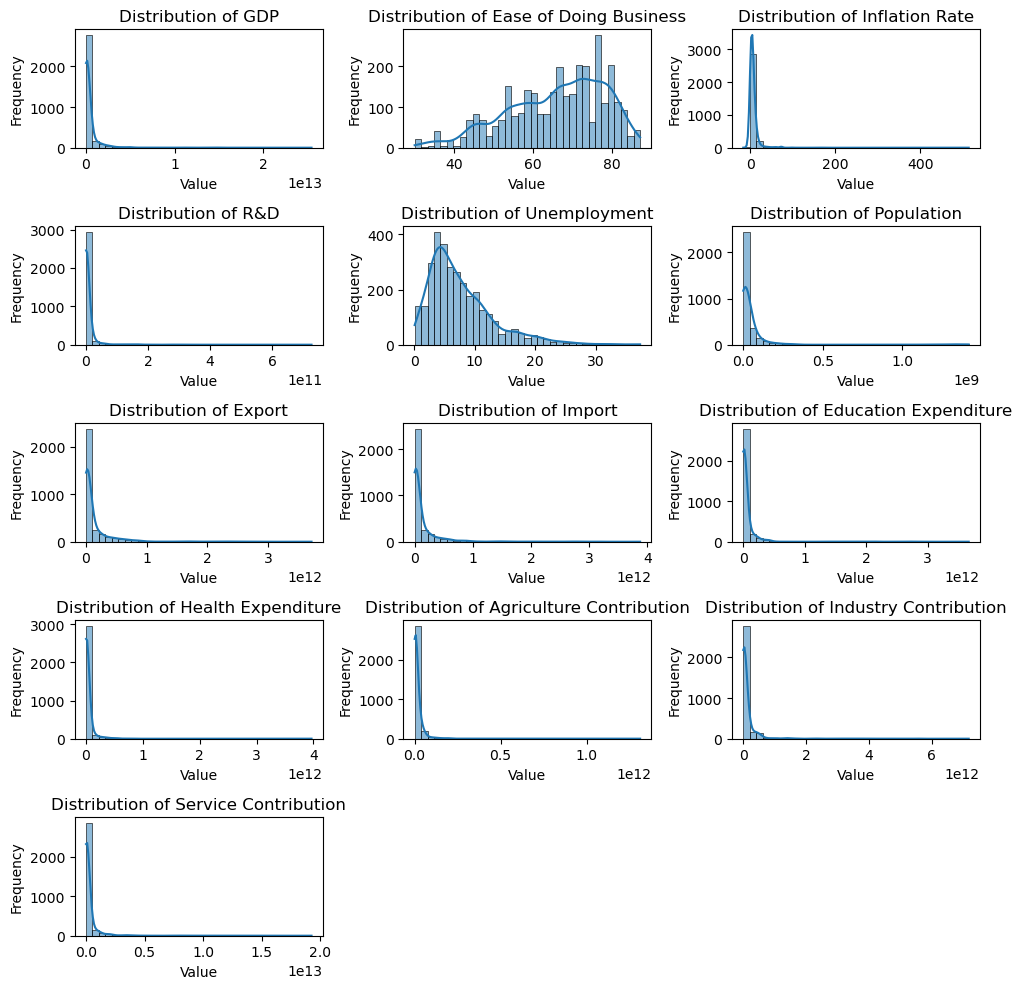

In [17]:
fig, axes = plt.subplots(5, 3, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(clean_world_numeric.columns):
    sns.histplot(clean_world_numeric[column], kde=True, bins=35, ax=axes[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')
    
for j in range(len(clean_world_numeric.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

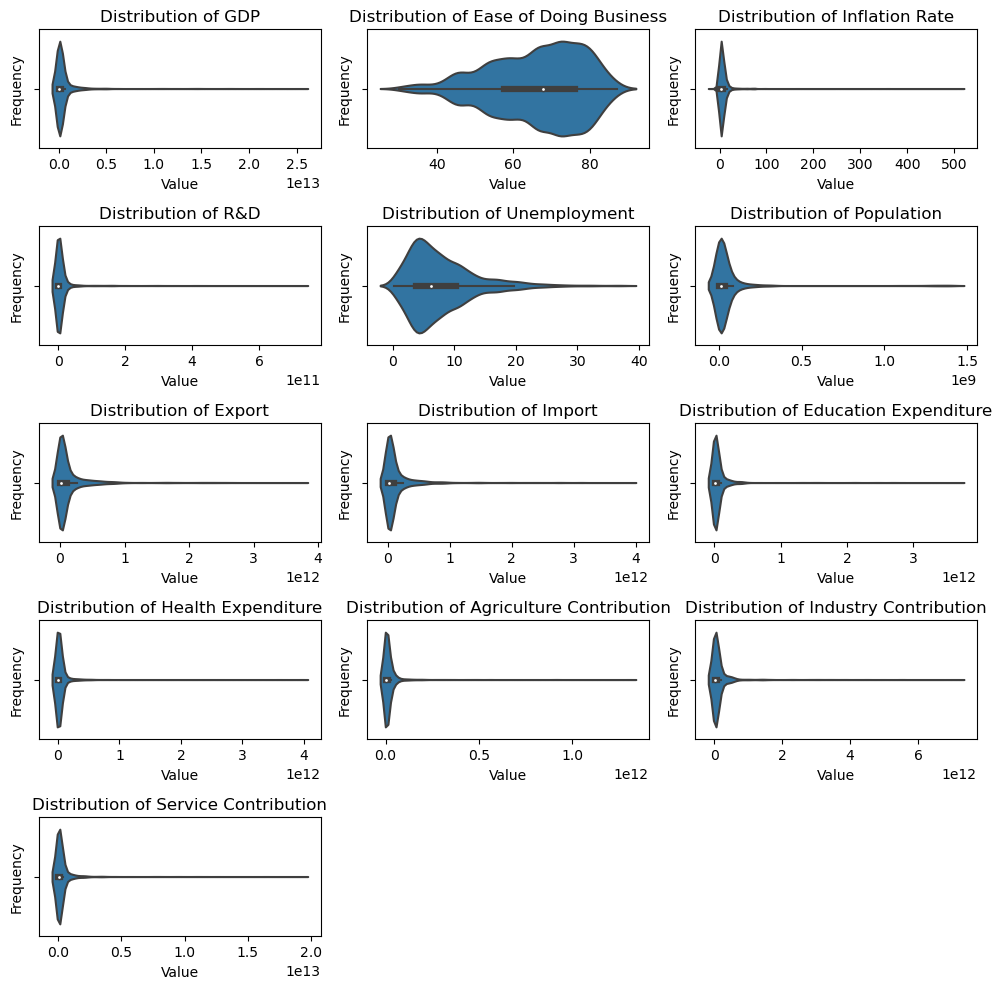

In [18]:
fig, axes = plt.subplots(5, 3, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(clean_world_numeric.columns):
    sns.violinplot(x=clean_world_numeric[column], ax=axes[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')

for j in range(len(clean_world_numeric.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

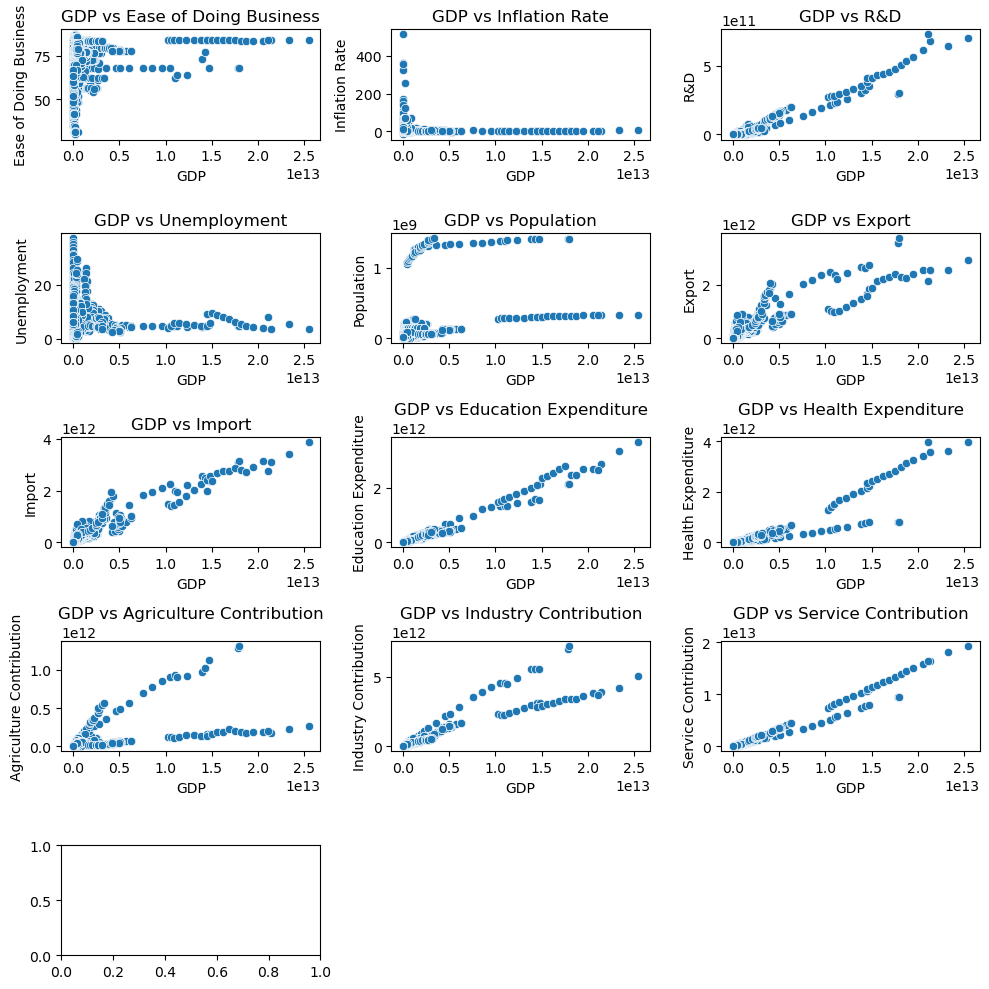

In [19]:
gdp_index = clean_world_numeric.columns.get_loc('GDP')

fig, axes = plt.subplots(5, 3, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(clean_world_numeric.columns[1:], start=1):  # Starting from the second column
    sns.scatterplot(x=clean_world_numeric.iloc[:, gdp_index], y=clean_world_numeric[column], ax=axes[i - 1])
    axes[i - 1].set_xlabel('GDP')
    axes[i - 1].set_ylabel(f'{column}')
    axes[i - 1].set_title(f'GDP vs {column}')

for j in range(len(clean_world_numeric.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Change over time

In [20]:
#lets look at how GDP has changed over time by continents
#then lets look at it on a map
#then lets make a correlation matrix to see which variables would have impacted this the most
#we will use spearman even though there is some linearity

In [21]:
continent_gdp = clean_world.groupby(['Continent Name', 'Year'])['GDP'].sum()
continent_gdp = continent_gdp.reset_index()
continent_gdp

Continent Name  Year           GDP
0           Africa  2000  6.002398e+11
1           Africa  2001  5.803578e+11
2           Africa  2002  6.049730e+11
3           Africa  2003  7.335585e+11
4           Africa  2004  8.858461e+11
..             ...   ...           ...
133  South America  2018  3.267639e+12
134  South America  2019  3.197346e+12
135  South America  2020  2.672552e+12
136  South America  2021  3.001733e+12
137  South America  2022  3.323939e+12

[138 rows x 3 columns]

<Axes: xlabel='Year', ylabel='GDP'>

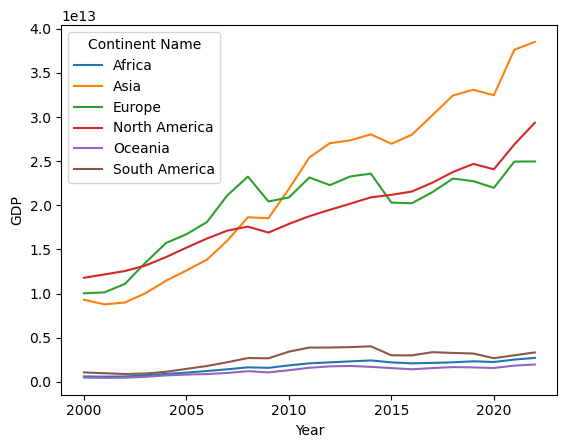

In [22]:
sns.lineplot(data=continent_gdp, x='Year', y='GDP', hue='Continent Name')

In [23]:
map1 = clean_world[clean_world['GDP'].isna()==False]
color_range_max = np.quantile(clean_world['GDP'],0.9)
color_range_min = np.quantile(clean_world['GDP'].dropna(),0.25)
px.choropleth(map1, locations = 'Country Code', animation_frame = 'Year', color = 'GDP',
              color_continuous_scale= 'Viridis', 
              range_color=[color_range_min,color_range_max],height = 800)

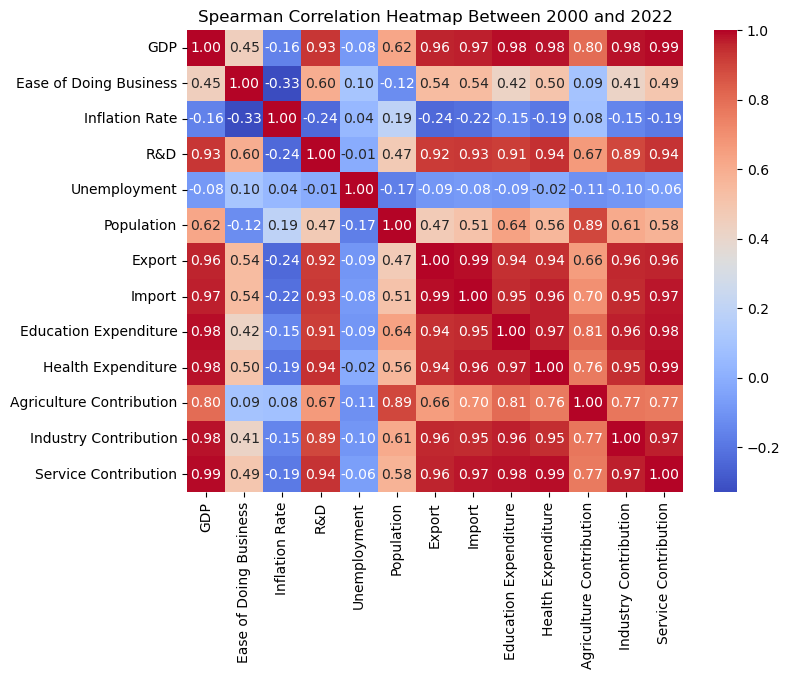

In [24]:
corr_matrix = clean_world_numeric.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap Between 2000 and 2022')
plt.show()

#given the high correlation we will use PCA 
#although it should be noted that the predictions itself will not be affected but the effect of the individual
#variables become difficult to ascertain as they will swing with small unit changes in other variables
#the correlation intuitvely makes sense as the variables are a percetange of the GDP

# Clustering

In [25]:
cluster_columns = ['Education Expenditure', 
                    'Service Contribution', 
                    'Import', 
                    'Industry Contribution', 
                    'R&D', 
                    'Export', 
                    'Health Expenditure', 
                    'Agriculture Contribution']

In [26]:
clean_world_numeric_clusters = clean_world_numeric[cluster_columns]

In [27]:
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/ following this tutorial

scaler = RobustScaler()
world_scaled = scaler.fit_transform(clean_world_numeric_clusters)

In [28]:
pca = PCA()
pca.fit(world_scaled)

PCA()

In [29]:
pca.explained_variance_ratio_

array([9.32806371e-01, 5.28076591e-02, 7.59277886e-03, 4.76375377e-03,
       1.27423557e-03, 3.63292993e-04, 3.44500341e-04, 4.74081509e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

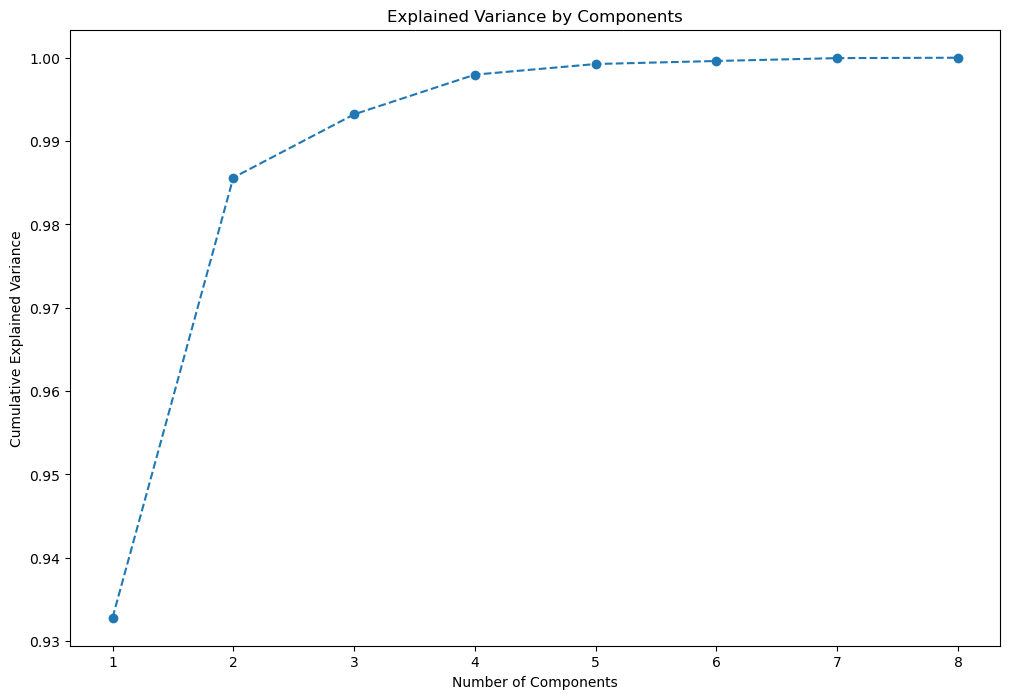

In [30]:
plt.figure(figsize = (12,8))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#lets go with 3 - it explains more than 80% of the variation and is also easy to plot

In [31]:
pca = PCA(n_components = 2)
pca.fit(world_scaled)

PCA(n_components=2)

In [32]:
pca.transform(world_scaled)

array([[-6.27861335, -1.30991398],
       [-6.27560377, -1.30632224],
       [-6.2732231 , -1.30080824],
       ...,
       [-6.198285  , -1.29287723],
       [-6.17715802, -1.26291302],
       [-6.14260814, -1.24920779]])

In [33]:
pca_scores = pca.transform(world_scaled)

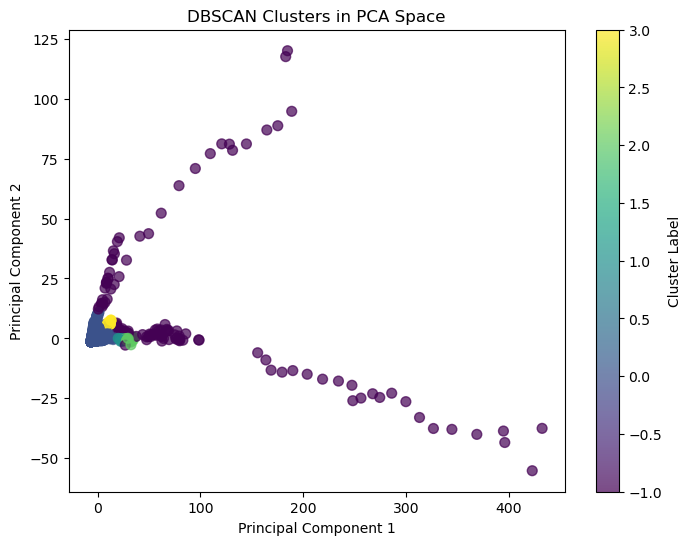

In [34]:
pca_scores_db = pca_scores.copy()
dbscan = DBSCAN(eps=2, min_samples=10)

clusters_db = dbscan.fit_predict(pca_scores_db)

plt.figure(figsize=(8, 6))

plt.scatter(pca_scores_db[:, 0], pca_scores_db[:, 1], c=clusters_db, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



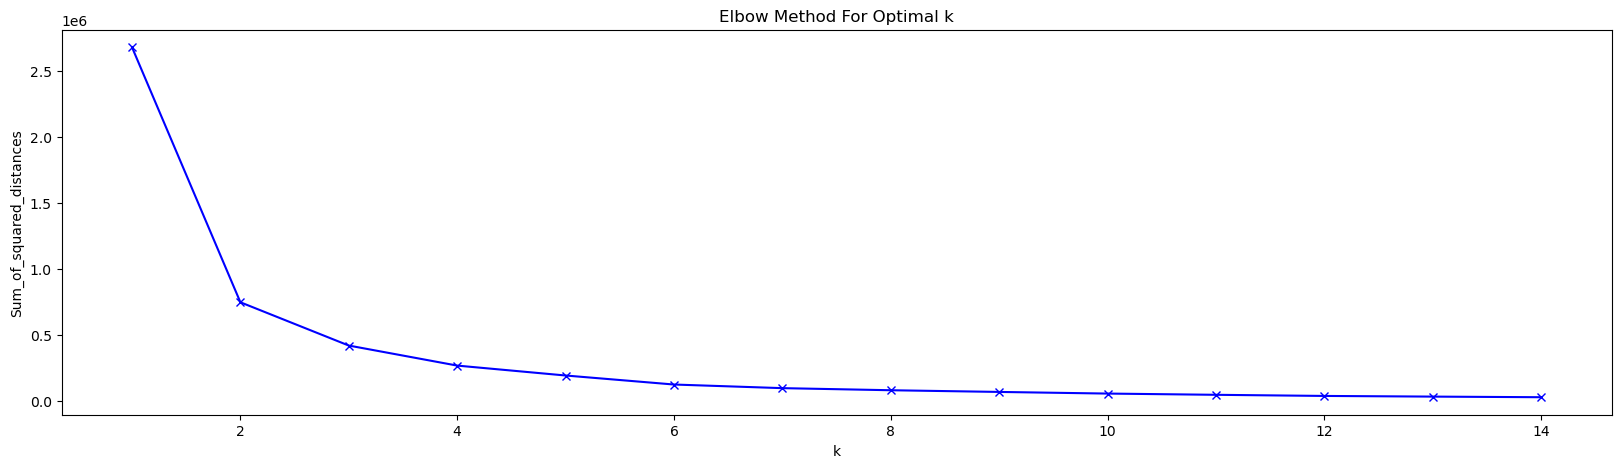

In [35]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_scores)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#lets use 3 clusters

In [36]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pca_scores)

cluster_labels = kmeans.fit_predict(pca_scores)

clean_world['Cluster'] = cluster_labels

clean_world

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\546978164.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name Country Code  Year  Ease of Doing Business           GDP  \
23        Albania          ALB  2000               64.763660  3.480355e+09   
24        Albania          ALB  2001               64.763660  3.922101e+09   
25        Albania          ALB  2002               64.763660  4.348068e+09   
26        Albania          ALB  2003               64.763660  5.611496e+09   
27        Albania          ALB  2004               64.763660  7.184686e+09   
...           ...          ...   ...                     ...           ...   
5078       Zambia          ZMB  2018               65.711700  2.631151e+10   
5079       Zambia          ZMB  2019               66.936480  2.330867e+10   
5080       Zambia          ZMB  2020               63.517218  1.811064e+10   
5081       Zambia          ZMB  2021               63.517218  2.214765e+10   
5082       Zambia          ZMB  2022               63.517218  2.978445e+10   

      Inflation Rate           R&D  Unemployment  Population Continent Name  \
23          0.050018  4.205835e+06        19.028   3089027.0         Europe   
24          3.107588  4.739663e+06        18.575   3060173.0         Europe   
25          7.770526  5.254423e+06        17.895   3051010.0         Europe   
26          0.484003  6.781213e+06        16.989   3039616.0         Europe   
27          2.280019  8.682333e+06        16.310   3026939.0         Europe   
...              ...           ...           ...         ...            ...   
5078        7.494572  1.785288e+07         5.030  17835893.0         Africa   
5079        9.150316  1.581540e+07         5.540  18380477.0         Africa   
5080       15.733060  1.228843e+07         6.030  18927715.0         Africa   
5081       22.020768  1.502762e+07         6.220  19473125.0         Africa   
5082       10.993204  2.020935e+07         6.131  20017675.0         Africa   

            Export        Import  Education Expenditure  Health Expenditure  \
23    7.000834e+08  1.508344e+09           3.528046e+08        2.068788e+08   
24    8.367179e+08  1.771127e+09           4.150340e+08        2.324171e+08   
25    9.107297e+08  2.068787e+09           4.298900e+08        2.463007e+08   
26    1.169850e+09  2.591006e+09           5.933372e+08        3.478521e+08   
27    1.596262e+09  3.220868e+09           7.689884e+08        4.350887e+08   
...            ...           ...                    ...                 ...   
5078  9.987165e+09  9.717093e+09           4.504193e+09        1.330511e+09   
5079  8.073235e+09  7.961078e+09           3.564331e+09        1.239905e+09   
5080  8.473998e+09  5.892355e+09           2.241739e+09        1.017435e+09   
5081  1.153414e+10  7.511107e+09           2.550111e+09        1.151733e+09   
5082  1.144675e+10  8.088544e+09           3.111824e+09        1.548867e+09   

      Agriculture Contribution  Industry Contribution  Service Contribution  \
23                8.532234e+08           6.750389e+08          1.541900e+09   
24                8.909509e+08           8.524990e+08          1.762711e+09   
25                9.576670e+08           1.004681e+09          1.903433e+09   
26                1.233309e+09           1.349880e+09          2.351861e+09   
27                1.475554e+09           1.772143e+09          3.059269e+09   
...                        ...                    ...                   ...   
5078              8.791001e+08           9.073608e+09          1.427256e+10   
5079              6.668085e+08           8.144510e+09          1.272741e+10   
5080              5.391693e+08           7.290963e+09          9.710268e+09   
5081              7.515310e+08           9.413211e+09          1.104817e+10   
5082              1.009293e+09           1.007711e+10          1.727152e+10   

      Cluster  
23          0  
24          0  
25          0  
26          0  
27          0  
...       ...  
5078        0  
5079        0  
5080        0  
5081        0  
5082        0  

[3174 rows x 18 columns]

In [37]:
world_scaled_pca_kmeans = pd.concat([clean_world_numeric_clusters.reset_index(drop = True), pd.DataFrame(pca_scores)], axis=1)
world_scaled_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2'
                                                #, 'Component 3'
                                               ]
world_scaled_pca_kmeans['Cluster'] = cluster_labels
world_scaled_pca_kmeans['Cluster Name'] = world_scaled_pca_kmeans['Cluster'].map({0: 'First',
                                                                                 1: 'Second',
                                                                                 2: 'Third'
                                                                                 })

world_scaled_pca_kmeans

Education Expenditure  Service Contribution        Import  \
0              3.528046e+08          1.541900e+09  1.508344e+09   
1              4.150340e+08          1.762711e+09  1.771127e+09   
2              4.298900e+08          1.903433e+09  2.068787e+09   
3              5.933372e+08          2.351861e+09  2.591006e+09   
4              7.689884e+08          3.059269e+09  3.220868e+09   
...                     ...                   ...           ...   
3169           4.504193e+09          1.427256e+10  9.717093e+09   
3170           3.564331e+09          1.272741e+10  7.961078e+09   
3171           2.241739e+09          9.710268e+09  5.892355e+09   
3172           2.550111e+09          1.104817e+10  7.511107e+09   
3173           3.111824e+09          1.727152e+10  8.088544e+09   

      Industry Contribution           R&D        Export  Health Expenditure  \
0              6.750389e+08  4.205835e+06  7.000834e+08        2.068788e+08   
1              8.524990e+08  4.739663e+06  8.367179e+08        2.324171e+08   
2              1.004681e+09  5.254423e+06  9.107297e+08        2.463007e+08   
3              1.349880e+09  6.781213e+06  1.169850e+09        3.478521e+08   
4              1.772143e+09  8.682333e+06  1.596262e+09        4.350887e+08   
...                     ...           ...           ...                 ...   
3169           9.073608e+09  1.785288e+07  9.987165e+09        1.330511e+09   
3170           8.144510e+09  1.581540e+07  8.073235e+09        1.239905e+09   
3171           7.290963e+09  1.228843e+07  8.473998e+09        1.017435e+09   
3172           9.413211e+09  1.502762e+07  1.153414e+10        1.151733e+09   
3173           1.007711e+10  2.020935e+07  1.144675e+10        1.548867e+09   

      Agriculture Contribution  Component 1  Component 2  Cluster Cluster Name  
0                 8.532234e+08    -6.278613    -1.309914        0        First  
1                 8.909509e+08    -6.275604    -1.306322        0        First  
2                 9.576670e+08    -6.273223    -1.300808        0        First  
3                 1.233309e+09    -6.263300    -1.281386        0        First  
4                 1.475554e+09    -6.253016    -1.262965        0        First  
...                        ...          ...          ...      ...          ...  
3169              8.791001e+08    -6.150185    -1.253836        0        First  
3170              6.668085e+08    -6.170533    -1.279076        0        First  
3171              5.391693e+08    -6.198285    -1.292877        0        First  
3172              7.515310e+08    -6.177158    -1.262913        0        First  
3173              1.009293e+09    -6.142608    -1.249208        0        First  

[3174 rows x 12 columns]

In [38]:
clean_world_numeric_kmeans = clean_world_numeric_clusters.assign(Cluster=cluster_labels)
grouped_kmeans = clean_world_numeric_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

Education Expenditure  Service Contribution        Import  \
Cluster                                                              
0                 3.467696e+10          1.565118e+11  9.124095e+10   
1                 2.547096e+12          1.355169e+13  2.752104e+12   
2                 7.513832e+11          4.135403e+12  1.354155e+12   

         Industry Contribution           R&D        Export  \
Cluster                                                      
0                 7.399184e+10  3.649429e+09  9.697379e+10   
1                 3.408748e+12  5.033312e+11  2.126569e+12   
2                 2.205693e+12  1.708044e+11  1.444158e+12   

         Health Expenditure  Agriculture Contribution  
Cluster                                                
0              1.925827e+10              1.312050e+10  
1              2.874402e+12              1.835759e+11  
2              5.618218e+11              2.693724e+11

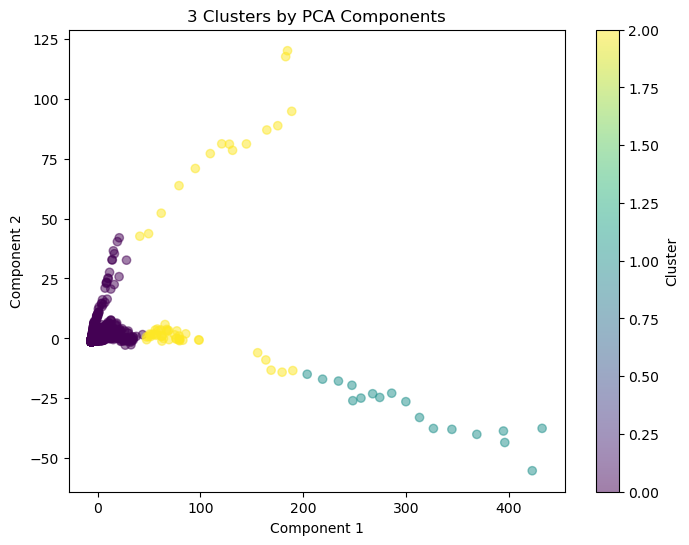

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(world_scaled_pca_kmeans['Component 1'], world_scaled_pca_kmeans['Component 2'],
            c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('3 Clusters by PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [40]:
summarized_kmeans = world_scaled_pca_kmeans.groupby(['Cluster Name']).size()
summarized_kmeans

Cluster Name
First     3098
Second      18
Third       58
dtype: int64

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\anaconda3\envs\visual_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Fasih Munir\AppData\Local\Temp\ipykernel_15132\2934861750.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



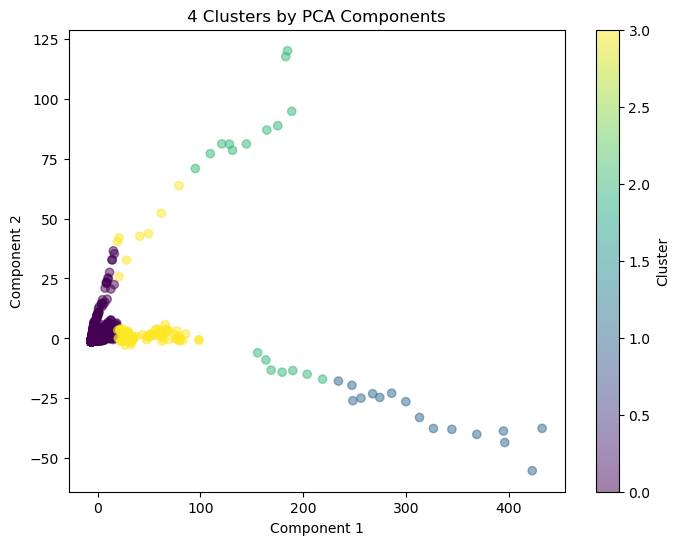

In [41]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pca_scores)

cluster_labels = kmeans.fit_predict(pca_scores)

clean_world['Cluster1'] = cluster_labels

#--------#

world_scaled_pca_kmeans1 = pd.concat([clean_world_numeric_clusters.reset_index(drop = True), pd.DataFrame(pca_scores)], axis=1)
world_scaled_pca_kmeans1.columns.values[-2: ] = ['Component 1', 'Component 2'
                                                 #, 'Component 3'
                                                ]
world_scaled_pca_kmeans1['Cluster1'] = cluster_labels
world_scaled_pca_kmeans1['Cluster Name1'] = world_scaled_pca_kmeans1['Cluster1'].map({0: 'First',
                                                                                 1: 'Second',
                                                                                 2: 'Third',
                                                                                    3: 'Fourth'
                                                                                     #4: 'Fifth'
                                                                                    # 5: 'Sixth'
                                                                                     })

plt.figure(figsize=(8, 6))
plt.scatter(world_scaled_pca_kmeans['Component 1'], world_scaled_pca_kmeans['Component 2'],
            c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('4 Clusters by PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [42]:
clean_world_numeric_clusters

Education Expenditure  Service Contribution        Import  \
23             3.528046e+08          1.541900e+09  1.508344e+09   
24             4.150340e+08          1.762711e+09  1.771127e+09   
25             4.298900e+08          1.903433e+09  2.068787e+09   
26             5.933372e+08          2.351861e+09  2.591006e+09   
27             7.689884e+08          3.059269e+09  3.220868e+09   
...                     ...                   ...           ...   
5078           4.504193e+09          1.427256e+10  9.717093e+09   
5079           3.564331e+09          1.272741e+10  7.961078e+09   
5080           2.241739e+09          9.710268e+09  5.892355e+09   
5081           2.550111e+09          1.104817e+10  7.511107e+09   
5082           3.111824e+09          1.727152e+10  8.088544e+09   

      Industry Contribution           R&D        Export  Health Expenditure  \
23             6.750389e+08  4.205835e+06  7.000834e+08        2.068788e+08   
24             8.524990e+08  4.739663e+06  8.367179e+08        2.324171e+08   
25             1.004681e+09  5.254423e+06  9.107297e+08        2.463007e+08   
26             1.349880e+09  6.781213e+06  1.169850e+09        3.478521e+08   
27             1.772143e+09  8.682333e+06  1.596262e+09        4.350887e+08   
...                     ...           ...           ...                 ...   
5078           9.073608e+09  1.785288e+07  9.987165e+09        1.330511e+09   
5079           8.144510e+09  1.581540e+07  8.073235e+09        1.239905e+09   
5080           7.290963e+09  1.228843e+07  8.473998e+09        1.017435e+09   
5081           9.413211e+09  1.502762e+07  1.153414e+10        1.151733e+09   
5082           1.007711e+10  2.020935e+07  1.144675e+10        1.548867e+09   

      Agriculture Contribution  
23                8.532234e+08  
24                8.909509e+08  
25                9.576670e+08  
26                1.233309e+09  
27                1.475554e+09  
...                        ...  
5078              8.791001e+08  
5079              6.668085e+08  
5080              5.391693e+08  
5081              7.515310e+08  
5082              1.009293e+09  

[3174 rows x 8 columns]

In [43]:
clean_world_numeric_kmeans1 = clean_world_numeric_clusters.assign(Cluster=cluster_labels)
grouped_kmeans1 = clean_world_numeric_kmeans1.groupby(['Cluster']).mean().round(1)
grouped_kmeans1

Education Expenditure  Service Contribution        Import  \
Cluster                                                              
0                 2.945088e+10          1.258639e+11  7.703793e+10   
1                 2.623720e+12          1.400599e+13  2.827485e+12   
2                 1.597984e+12          7.471457e+12  2.117235e+12   
3                 3.528953e+11          2.191852e+12  8.990981e+11   

         Industry Contribution           R&D        Export  \
Cluster                                                      
0                 6.384856e+10  2.631708e+09  8.275955e+10   
1                 3.475623e+12  5.236510e+11  2.219156e+12   
2                 4.153152e+12  2.758627e+11  2.075856e+12   
3                 9.067639e+11  8.594938e+10  9.455223e+11   

         Health Expenditure  Agriculture Contribution  
Cluster                                                
0              1.477821e+10              1.225590e+10  
1              2.987965e+12              1.884302e+11  
2              1.032020e+12              6.632302e+11  
3              3.147745e+11              7.128200e+10

In [44]:
summarized_kmeans1 = world_scaled_pca_kmeans1.groupby(['Cluster Name1']).size()
summarized_kmeans1

Cluster Name1
First     3036
Fourth     104
Second      16
Third       18
dtype: int64

In [45]:
#fig = plt.figure(figsize=(8, 8))
#ax = plt.axes(projection ='3d')

#x = world_scaled_pca_kmeans['Component 1']
#y = world_scaled_pca_kmeans['Component 2']
#z = world_scaled_pca_kmeans['Component 3']
#category = world_scaled_pca_kmeans['Cluster Name']

#colors = {'First': 'red', 'Second': 'green', 'Third': 'blue'}

#for cat in category.unique():
#    ax.scatter(x[category == cat], y[category == cat], z[category == cat], c=colors[cat], label=f'{cat} Category')

#ax.set_xlabel('Component 1')
#ax.set_ylabel('Component 2')
#ax.set_zlabel('Component 3', labelpad=-2)
#ax.set_title('3 Clusters by PCA Components')
#ax.legend() 

#plt.show()

In [46]:
#num_clusters = 6

#kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#kmeans.fit(pca_scores)

#cluster_labels = kmeans.fit_predict(pca_scores)

#clean_world['Cluster1'] = cluster_labels

#--------#

#world_scaled_pca_kmeans1 = pd.concat([clean_world_numeric.reset_index(drop = True), pd.DataFrame(pca_scores)], axis=1)
#world_scaled_pca_kmeans1.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
#world_scaled_pca_kmeans1['Cluster1'] = cluster_labels
#world_scaled_pca_kmeans1['Cluster Name1'] = world_scaled_pca_kmeans1['Cluster1'].map({0: 'First',
#                                                                                 1: 'Second',
#                                                                                 2: 'Third',
#                                                                                    3: 'Fourth',
#                                                                                     4: 'Fifth',
#                                                                                     5: 'Sixth'
#                                                                                     })

#fig = plt.figure(figsize=(8, 8))
#ax = plt.axes(projection ='3d')

#x = world_scaled_pca_kmeans1['Component 1']
#y = world_scaled_pca_kmeans1['Component 2']
#z = world_scaled_pca_kmeans1['Component 3']
#category = world_scaled_pca_kmeans1['Cluster Name1']

#colors = {'First': 'red', 
#          'Second': 'green', 
#          'Third': 'blue', 
#          'Fourth': 'purple',
#         'Fifth': 'pink',
#         'Sixth': 'black'
#         }

#for cat in category.unique():
#    ax.scatter(x[category == cat], y[category == cat], z[category == cat], c=colors[cat], label=f'{cat} Category')

#ax.set_xlabel('Component 1')
#ax.set_ylabel('Component 2')
#ax.set_zlabel('Component 3', labelpad=-2)
#ax.set_title('6 Clusters by PCA Components')
#ax.legend() 

#plt.show()

In [47]:
column_names = world_scaled_pca_kmeans.columns.tolist()

components = pca.components_

component_1_loadings = components[0]
most_important_variables = sorted(range(len(component_1_loadings)), key=lambda i: abs(component_1_loadings[i]), 
                                  reverse=True)

important_variable_names = [column_names[i] for i in most_important_variables]

print("Most important variables in Component 1:", important_variable_names)

Most important variables in Component 1: ['R&D', 'Health Expenditure', 'Service Contribution', 'Education Expenditure', 'Industry Contribution', 'Import', 'Agriculture Contribution', 'Export']


In [48]:
map2 = clean_world[clean_world['Cluster1'].isna()==False]
color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'
            # , 4: 'pink', 5: 'black'
            }
color_range_max = max(clean_world['Cluster1'])
color_range_min = min(clean_world['Cluster1'])
px.choropleth(map2, locations = 'Country Code', animation_frame = 'Year', color = 'Cluster1',
              color_discrete_map= color_map, 
              range_color=[color_range_min,color_range_max],
              height = 800)

# linear regression

In [49]:
y = clean_world_numeric.iloc[:, 0]
X = clean_world_numeric.iloc[:, 1:]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
pca = PCA(n_components=2)  #using same as last time
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [53]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [54]:
predictions = model.predict(X_test_pca)

In [55]:
r2 = r2_score(y_test, predictions)
print(f"R-squared score: {r2}")

R-squared score: 0.9924380779168906


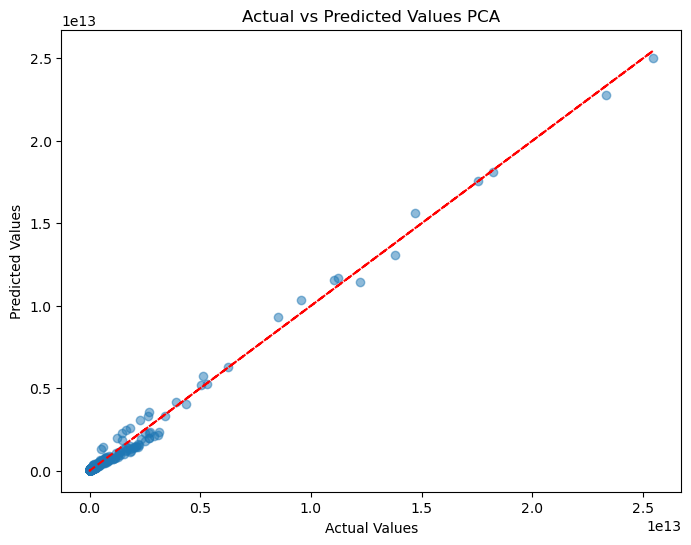

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Actual vs Predicted Values PCA')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

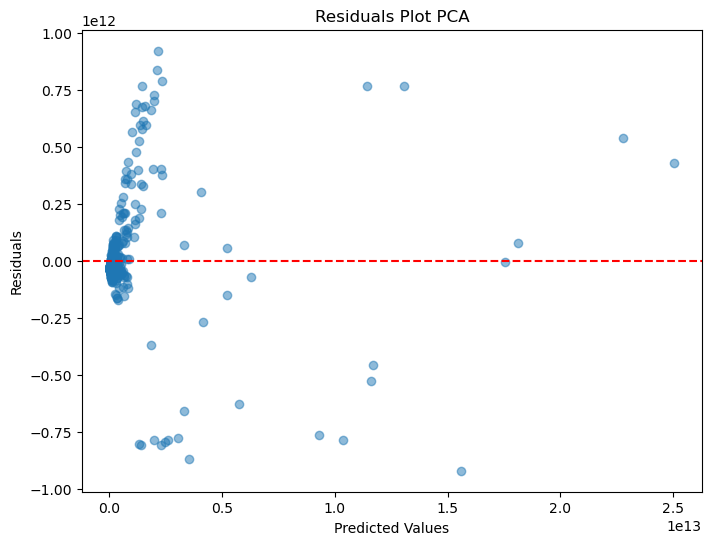

In [57]:
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot PCA')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

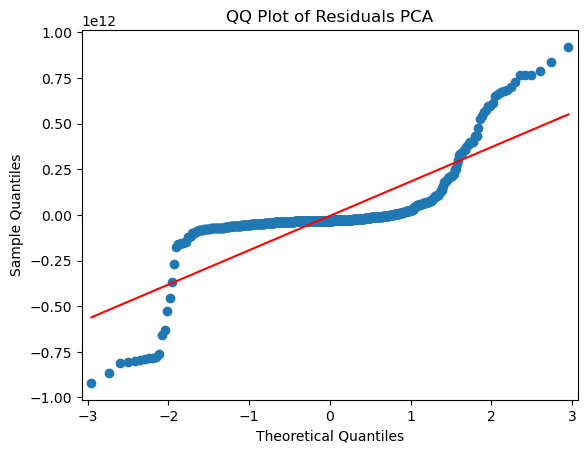

In [58]:
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals PCA')
plt.show()

In [59]:
selected_columns = ['Education Expenditure', 
                    'Service Contribution', 
                    'Import', 
                    'Industry Contribution', 
                    'R&D', 
                    'Export', 
                    'Health Expenditure', 
                    'Agriculture Contribution',
                    'Population', 'Ease of Doing Business',
                    'Unemployment', 
                    'Inflation Rate']

other_columns = ['GDP']
X1 = clean_world_numeric[selected_columns]
y1 = clean_world_numeric[other_columns]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

model1 = LinearRegression()
model1.fit(X_train_scaled1, y_train1)

predictions1 = model1.predict(X_test_scaled1)

r2_1 = r2_score(y_test1, predictions1)
print(f"R-squared score: {r2_1}")

R-squared score: 0.9998254022515861


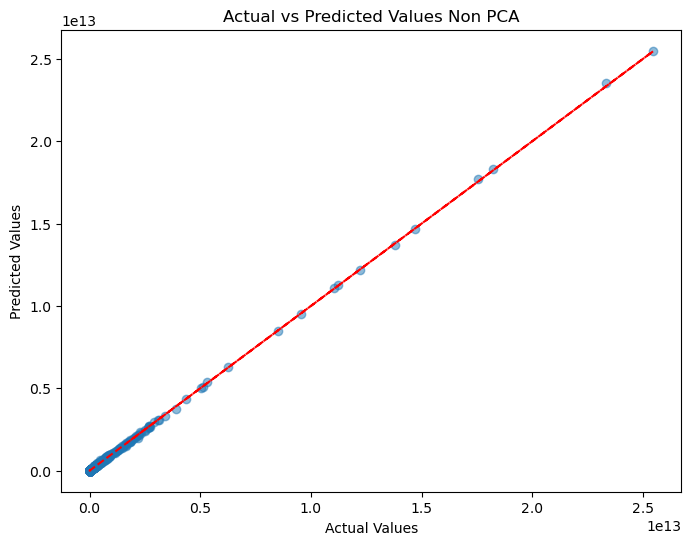

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, predictions1, alpha=0.5)
plt.plot(y_test1, y_test1, color='red', linestyle='--')
plt.title('Actual vs Predicted Values Non PCA')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

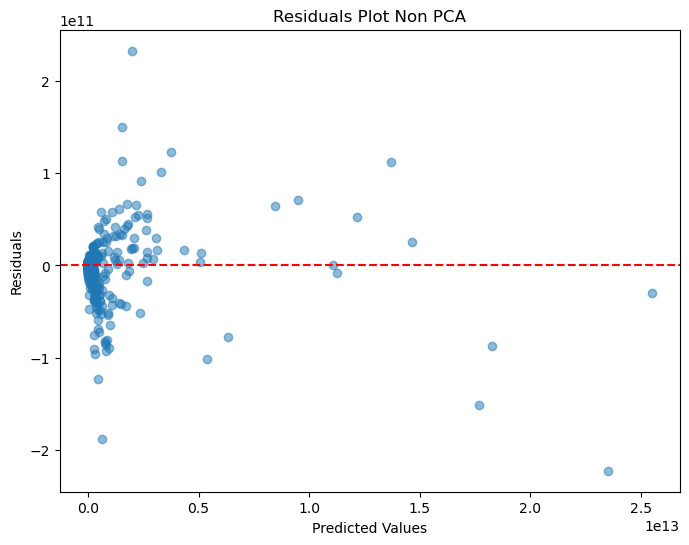

In [61]:
residuals1 = y_test1 - predictions1
plt.figure(figsize=(8, 6))
plt.scatter(predictions1, residuals1, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot Non PCA')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

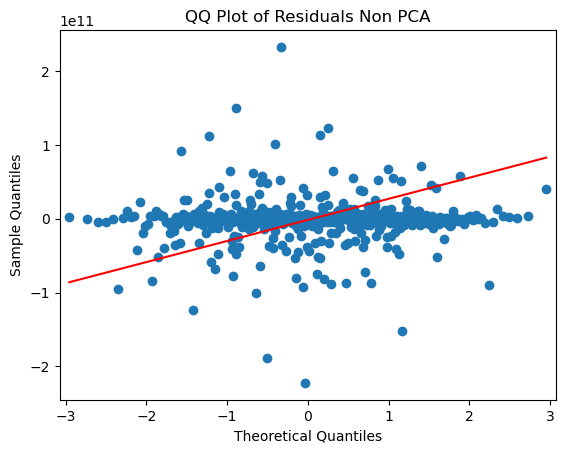

In [62]:
sm.qqplot(residuals1, line='s')
plt.title('QQ Plot of Residuals Non PCA')
plt.show()

In [63]:
#do a normal linear regression and then a regression using pca
#you are comparing the effects of linearity and the correlation
#or we can also look at the fact that just one variable that is highly correlated to GDP gives the same R2
#as using all the variables
#but is it necessarily better just to use the 1 variable? we have to rely on the plots to see this

In [64]:
selected_columns1 = ['Education Expenditure', 
                    'Service Contribution', 
                    'Import', 
                    'Industry Contribution', 
                    'R&D', 
                    'Export', 
                    'Health Expenditure', 
                    'Agriculture Contribution',
                    'Population', 'Ease of Doing Business',
                    'Unemployment', 
                    'Inflation Rate']

other_columns1 = ['GDP']
X2 = clean_world_numeric[selected_columns1]
y2 = clean_world_numeric[other_columns1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

lasso = Lasso(alpha=10000000000) #trial and error lead to this value by increasing with a value of 10
lasso.fit(X_train_scaled2, y_train2)

# Predict on the test set
predictions2 = lasso.predict(X_test_scaled2)

coefficients = pd.Series(lasso.coef_, index=X2.columns)

variables_retained = coefficients[coefficients != 0].index.tolist()
variables_eliminated = coefficients[coefficients == 0].index.tolist()

print("Variables retained in the model:")
print(variables_retained)

print("\nVariables eliminated from the model:")
print(variables_eliminated)

# Evaluate the model
r2_2 = lasso.score(X_test_scaled2, y_test2) 
print(f"R-squared score: {r2_2}")

Variables retained in the model:
['Education Expenditure', 'Service Contribution', 'Industry Contribution', 'R&D', 'Export', 'Agriculture Contribution', 'Population']

Variables eliminated from the model:
['Import', 'Health Expenditure', 'Ease of Doing Business', 'Unemployment', 'Inflation Rate']
R-squared score: 0.9997968560906075


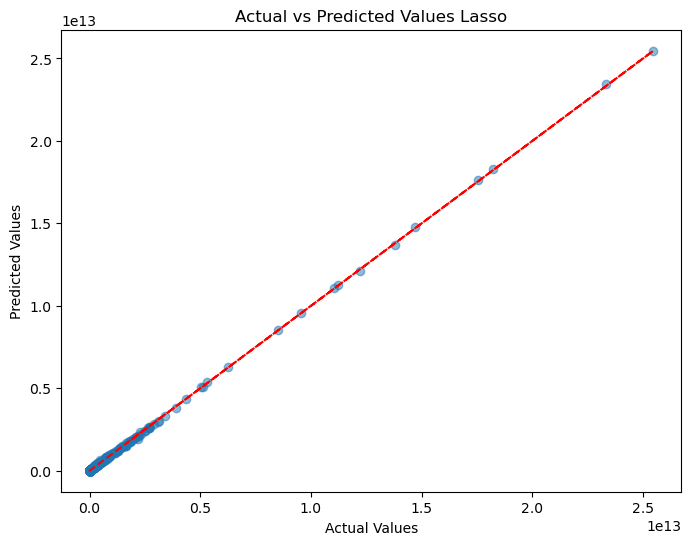

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, predictions2, alpha=0.5)
plt.plot(y_test2, y_test2, color='red', linestyle='--')
plt.title('Actual vs Predicted Values Lasso')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

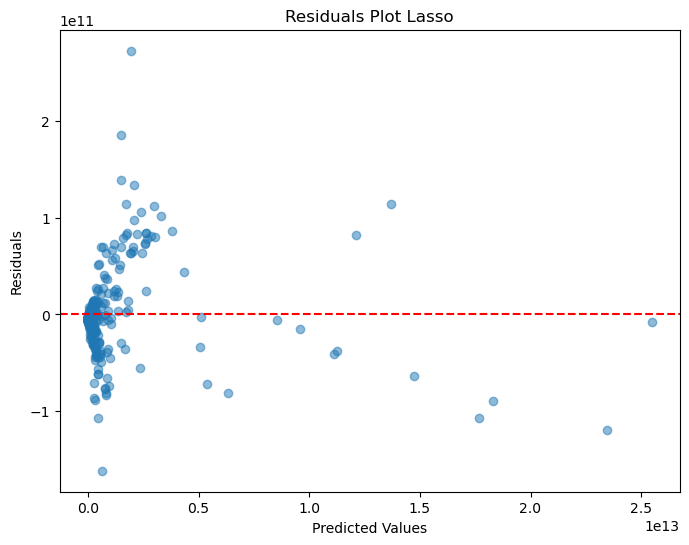

In [66]:
residuals2 = y_test2.values.flatten() - predictions2.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(predictions2, residuals2, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot Lasso')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

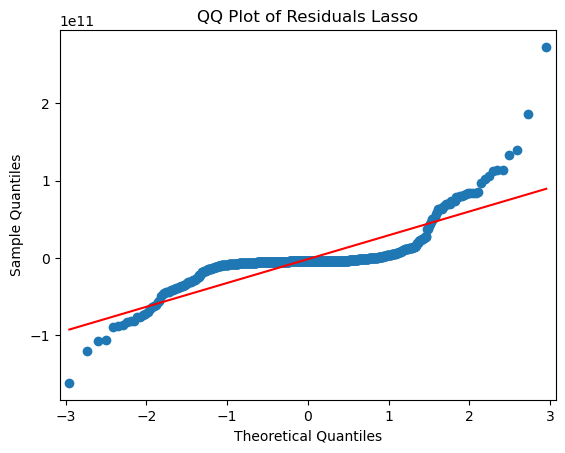

In [67]:
sm.qqplot(residuals2, line='s')
plt.title('QQ Plot of Residuals Lasso')
plt.show()